In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mygene
import h5py
import networkx as nx
import seaborn as sns
%matplotlib inline


In [389]:
## Experimentos com graficos para parte de comparação de níveis ômicos e de função de custo

# a = crossentropy          = cross entropy 
# b = undersampling         = undersampling
# d = weighted_focalloss    = weighted focal loss (gamma=0, alpha=0.85) 
# e = focalloss_05          = focal loss (gamma=0.5, alpha=0.50) 
# f = focalloss_1           = focal loss (gamma=1, alpha=0.25) 
# g = focalloss_2           = focal loss (gamma=2, alpha=0.25) 

# GraphSAGE

algoritmo = 'GCN'
alg = 'gcn'

rede = 'iref'
net = 'IREF'

loss_name = 'crossentropy'

hist_complete = pd.read_csv(f'C:/Users/renan/Desktop/experiments/{algoritmo}/history_complete/{rede}_{loss_name}.tsv', sep='\t')


In [390]:
feature_part = hist_complete.loc[hist_complete['feature'] == 'omics_centrality']

In [391]:
SMALL_SIZE = 22 #22 para individual 
MEDIUM_SIZE = 26 #24 para figura individual #26 para pagina completa
BIGGER_SIZE = 26 #24 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

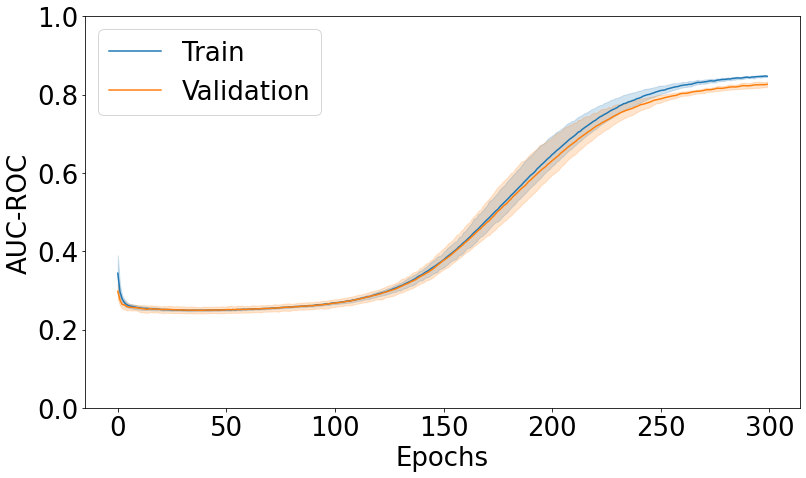

In [392]:
plt.figure(figsize=(12.80,7.20))
#plt.title(label=algoritmo, fontsize=30)



sns.lineplot(data=feature_part, x='epochs', y="auc_roc", label='Train')
sns.lineplot(data=feature_part, x='epochs', y="val_auc_roc", label='Validation')
plt.legend(loc='upper left')

plt.xlabel("Epochs")
plt.ylabel("AUC-ROC")
plt.ylim(0, 1)


file_name = f"C:/Users/renan/Desktop/teste/{alg}_roc.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")

In [ ]:
teste = pd.read_csv(f'C:/Users/renan/Desktop/predict/concat/unity_complete.tsv', sep='\t')
teste

,epochs,loss,acc,auc_roc,auc_pr,val_loss,val_acc,val_auc_roc,val_auc_pr,fold
0,0,481.962036,0.933215,0.255894,0.035965,104.653801,0.940922,0.242710,0.035598,1
1,1,421.336700,0.941095,0.204140,0.033904,102.469109,0.940922,0.245036,0.035726,1
2,2,412.464966,0.941095,0.205653,0.033961,98.190247,0.940922,0.247384,0.035845,1
3,3,394.532562,0.941095,0.208459,0.034058,95.076187,0.940922,0.253400,0.036049,1
4,4,381.333466,0.941095,0.213283,0.034226,91.965157,0.940922,0.261380,0.036795,1
...,...,...,...,...,...,...,...,...,...,...
2495,495,228.606384,0.948390,0.901087,0.478826,56.964344,0.916864,0.870459,0.430873,5
2496,496,211.474823,0.922092,0.891687,0.492267,61.018482,0.884949,0.867821,0.429353,5
2497,497,230.150299,0.892150,0.887288,0.485296,55.993572,0.946414,0.872355,0.435464,5
2498,498,202.704391,0.949473,0.895101,0.500335,63.850712,0.947203,0.873971,0.438808,5


In [ ]:
part = teste.loc[teste['epochs'] == 499]
part

,epochs,loss,acc,auc_roc,auc_pr,val_loss,val_acc,val_auc_roc,val_auc_pr,fold
499,499,195.754395,0.937451,0.903214,0.536925,52.801655,0.942891,0.885377,0.490982,1
999,499,209.217987,0.929774,0.893276,0.494053,48.423523,0.952719,0.911482,0.545904,2
1499,499,196.428436,0.942776,0.900711,0.532352,58.716270,0.951537,0.868990,0.453863,3
1999,499,203.134308,0.937851,0.896380,0.479639,51.038887,0.952719,0.889747,0.553582,4
2499,499,228.343918,0.948882,0.899432,0.504304,56.740307,0.948779,0.871478,0.440091,5


In [ ]:
auc_pr_mean = part.auc_roc.mean()
auc_pr_std = part.auc_roc.std()

val_auc_pr_mean = part.val_auc_roc.mean()
val_auc_pr_std = part.val_auc_roc.std()

print(f'Treinamento: {auc_pr_mean:.4f} +- {auc_pr_std:.4f}')
print(f'Validação:   {val_auc_pr_mean:.4f} +- {val_auc_pr_std:.4f}')

Treinamento: 0.8986 +- 0.0039
Validação:   0.8854 +- 0.0170


-----

### Script para transformar os barplot do excel em padrão mathplotlib

In [5]:
SMALL_SIZE = 22 #22 para individual 
MEDIUM_SIZE = 24 #24 para figura individual #26 para pagina completa
BIGGER_SIZE = 24 #24 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('ytick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

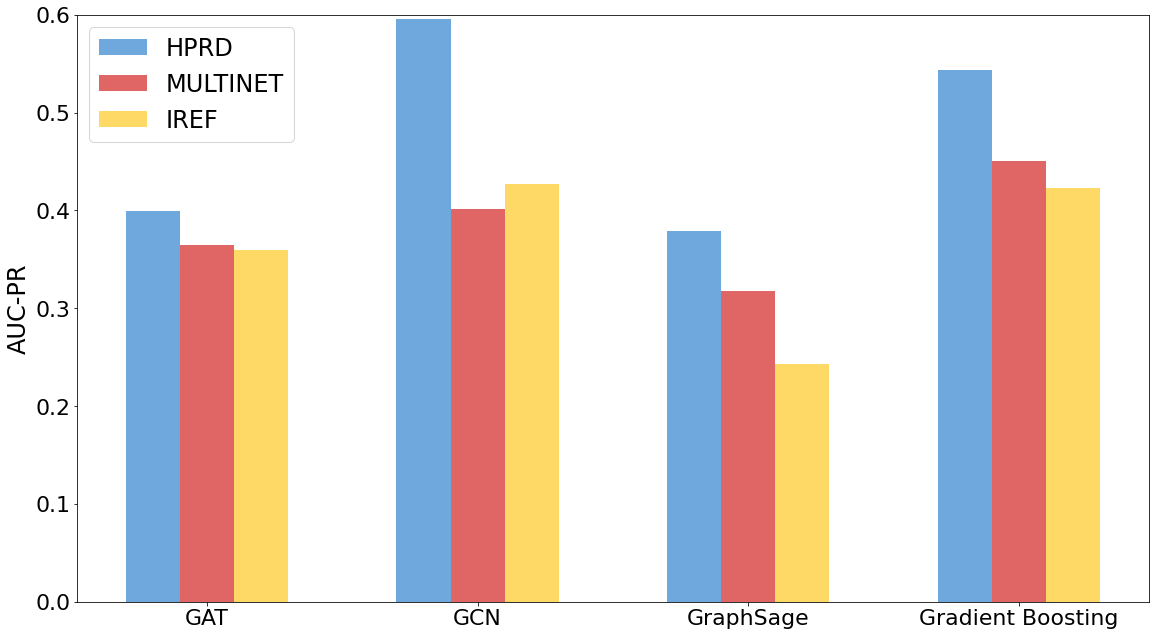

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(19.20,10.80))
plt.ylim(0, 0.6)

  

x = np.arange(4)
HPRD = [0.3992,	0.5960,	0.3786,	0.5437]
MULTINET = [0.3648,	0.4019,	0.3174,	0.4505]
IREF = [0.3598,	0.4274,	0.2427,	0.4230]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, HPRD, width, color='#6fa8dc')
plt.bar(x, MULTINET, width, color='#e06666')
plt.bar(x+0.2, IREF, width, color='#ffd966')
plt.xticks(x, ['GAT', 'GCN', 'GraphSage', 'Gradient Boosting'])

plt.ylabel("AUC-PR")
plt.legend(["HPRD", "MULTINET", "IREF"])



file_name = f"C:/Users/renan/Desktop/teste/testebarplot.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")

plt.show()

In [3]:
plotdata = pd.DataFrame({
    "Train":[4533, 8220, 8578, 9798, 12227, 11204, 12718],
    "Test":[1134, 1134, 1134, 1134, 1134, 1134, 1134],
    
    }, index=['HPRD', 'MULTINET', 'IREF', 'CPDB', 'PCNET', 'STRING', 'UNION']
)
plotdata.head()

,Train,Test
HPRD,4533,1134
MULTINET,8220,1134
IREF,8578,1134
CPDB,9798,1134
PCNET,12227,1134


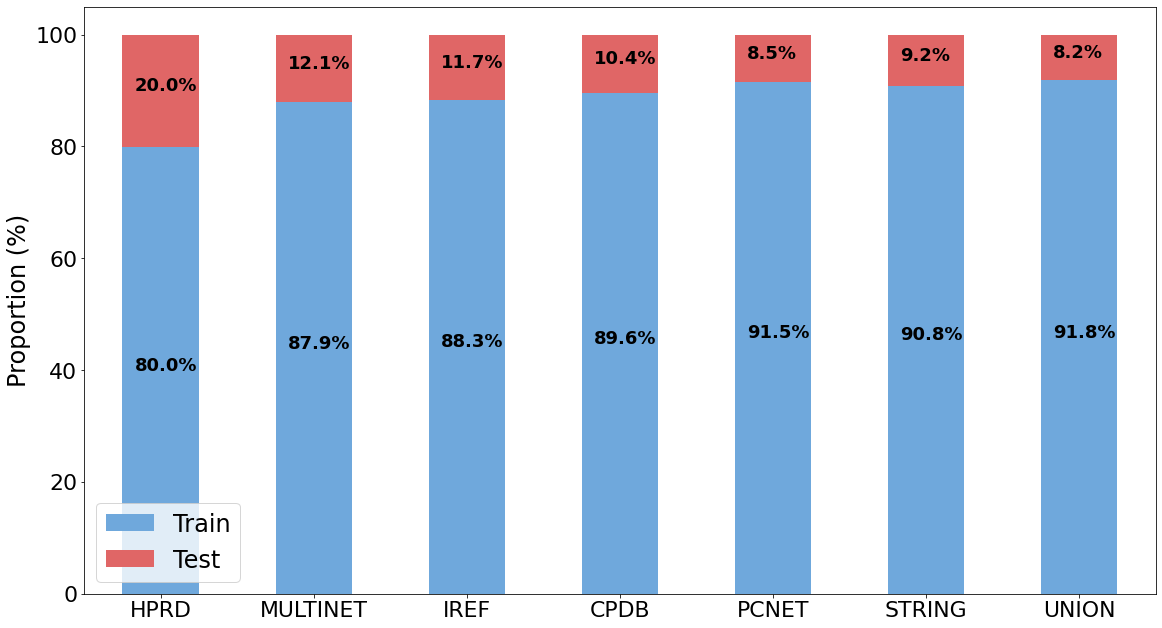

In [13]:


from matplotlib import colors



stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)



cmap = colors.ListedColormap(['#6fa8dc', '#e06666'])



stacked_data.plot(kind='bar', 
                    stacked=True, 
                    colormap=cmap, 
                    figsize=(19.20,10.80))


plt.xticks(rotation='horizontal')
plt.legend(loc="lower left")
plt.ylabel("Proportion (%)")



for n, x in enumerate([*plotdata.index.values]):
    for (proportion, y_loc) in zip(stacked_data.loc[x],
                                   stacked_data.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 
                 fontsize=18,
                 fontweight="bold")










file_name = f"C:/Users/renan/Desktop/teste/testebarplot3.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")

